In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv("Sales_data_zone_wise.csv")
df.head(10)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
df.shape

(29, 5)

In [4]:
# To check the null values
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


XYZ Company has offices in four different zones.The dataset contain sales amount of four different zones.There are 29 entries and 5 columns.Four zones with integer value and Month as object.
There is no missing values present in the dataset.

In [6]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


### ● The mean sales generated by each zone.


In [7]:
mean_sales = df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()

In [8]:
mean_sales

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [10]:
Zones = 'Zone - A','Zone - B','Zone - C','Zone - D'
Zones

('Zone - A', 'Zone - B', 'Zone - C', 'Zone - D')

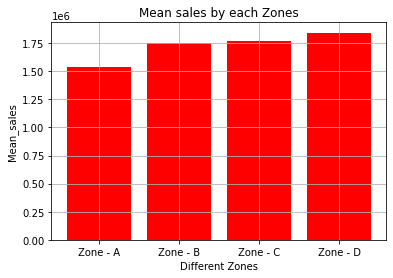

In [11]:
plt.bar(Zones,mean_sales,color ='red')
plt.title('Mean sales by each Zones')
plt.xlabel('Different Zones')
plt.ylabel('Mean_sales')
plt.grid()

In [12]:
# Insights

    Here, Zone-D has high mean score than other zones.Mean sales of Zone A is low.

### ● Total sales generated by all the zones for each month.

In [38]:
Total_sales = df.sum(axis = 1)
Total_sales

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

    Here, the total sales of all zones in each month the highest sales occur in month 3-(817449) and the lowest sale occur in month 12-(5925424)

### ● Check whether all the zones generate the same amount of sales.

In [13]:
# One way Anova can be used

    Ho:Amount of sales generated by all the zones are same
    H1:Amount of sales generated by all the zones are different

In [14]:
F,P=stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

In [15]:
F,P

(5.672056106843581, 0.0011827601694503335)

In [16]:
pvalue = 0.0011827601694503335
print('pvalue =',pvalue)
if pvalue < 0.05:
    print('Reject the null hypothesis(Ho)')
else:
    print('Accept null hypothesis(Ho)')

pvalue = 0.0011827601694503335
Reject the null hypothesis(Ho)


### Insights

     Here, pvalue = 0.0011 < 0.05, we can reject the null hypothesis.That is amount of sales generated by all the zones are different.